# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diamond Price Analysis & Prediction</p>

<p style="text-align:center; ">
<img src="https://img.freepik.com/free-vector/elegant-perfect-colorful-diamond-template_225004-1364.jpg?size=338&ext=jpg&ga=GA1.2.609902036.1659291337&semt=sph" style='width: 350px; height: 350px;'>
</p>

<p style="text-align:justify; ">
<B>Diamond</B> is a solid form of the element carbon with its atoms arranged in a crystal structure called diamond cubic. At room temperature and pressure, another solid form of carbon known as graphite is the chemically stable form of carbon, but diamond converts to it extremely slowly. Diamond has the highest hardness and thermal conductivity of any natural material, properties that are used in major industrial applications such as cutting and polishing tools. They are also the reason that diamond anvil cells can subject materials to pressures found deep in the Earth.
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#1c1c1c"> Importing Libraries</font>](#1)                   |9   | [<font color="#1c1c1c"> Diamond's Clarity</font>](#9)                 |
|2   | [<font color="#1c1c1c"> About Dataset</font>](#2)                         |10   | [<font color="#1c1c1c"> Diamond's Weight In Carat</font>](#10)   |     
|3   | [<font color="#1c1c1c"> Basic Exploration</font>](#3)                     |11  | [<font color="#1c1c1c"> Diamond's Depth Percentage</font>](#11)|
|4   | [<font color="#1c1c1c"> Dataset Summary</font>](#4)                       |12  | [<font color="#1c1c1c"> Diamond's Table</font>](#12)   |       
|5   | [<font color="#1c1c1c"> Custom Palette For Visualization</font>](#5)      |13  | [<font color="#1c1c1c"> Outlier Detection</font>](#13)    |     
|6   | [<font color="#1c1c1c"> Diamond's Price</font>](#6)              |14  | [<font color="#1c1c1c"> Correlation Map</font>](#14)  |     
|7   | [<font color="#1c1c1c"> Diamond's Cut</font>](#7)              |15  | [<font color="#1c1c1c"> Model Creation & Performance Evaluation</font>](#15)  |    
|8   | [<font color="#1c1c1c"> Diamond's Color</font>](#8)              |16  | [<font color="#1c1c1c"> Thank You</font>](#16)  |
   

<a id="1"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error



<a id="2"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

* **carat:** Weight(0.2 to 5.01) of the diamond
* **cut:** Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color:** Diamond colour from J(worst) to D(best)
* **clarity:** Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x:** Length(0 to 10.74) in mm
* **y:** Width(0 to 58.9) in mm
* **z:** Depth(0 to 31.8) in mm
* **depth %:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter. Total depth percentage(43 to 79) = z/mean(x,y) = 2\*z/(x+y)
* **table:** Width(43 to 95) of the top of diamond relative to widest point
* **price:** Price in US dollar


In [4]:
data = pd.read_csv("/content/diamonds.csv",index_col=0)

<a id="3"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</p>


**Let's have a glimpse of the dataset.**

In [7]:
print("Shape Of The Dataset : {data.shape}")
print("\nGlimpse Of The Dataset :")
data.head()

Shape Of The Dataset : {data.shape}

Glimpse Of The Dataset :


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
print("Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [10]:
print(f"Summary Of The Dataset :")
data.describe()

Summary Of The Dataset :


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

In [12]:
print(f"Null values of the Dataset :")
# Add your code here to calculate the null values in all the dataset

Null values of the Dataset :


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


**Insights:**

* There is no missing value.
* We will encode the categorical features into numerical form later.

<a id="5"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</p>

In [13]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#f2d4b1","figure.facecolor":"#f2d4b1","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

palette = ["#c94727","#ea5b17","#e57716","#f2a324","#a2c0a6","#7ac0a8","#5e9786","#557260"]

# sns.palplot(sns.color_palette(palette))
# plt.show()

<a id="6"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diamond's Price</p>

Let's have a look on the distribution of prices :


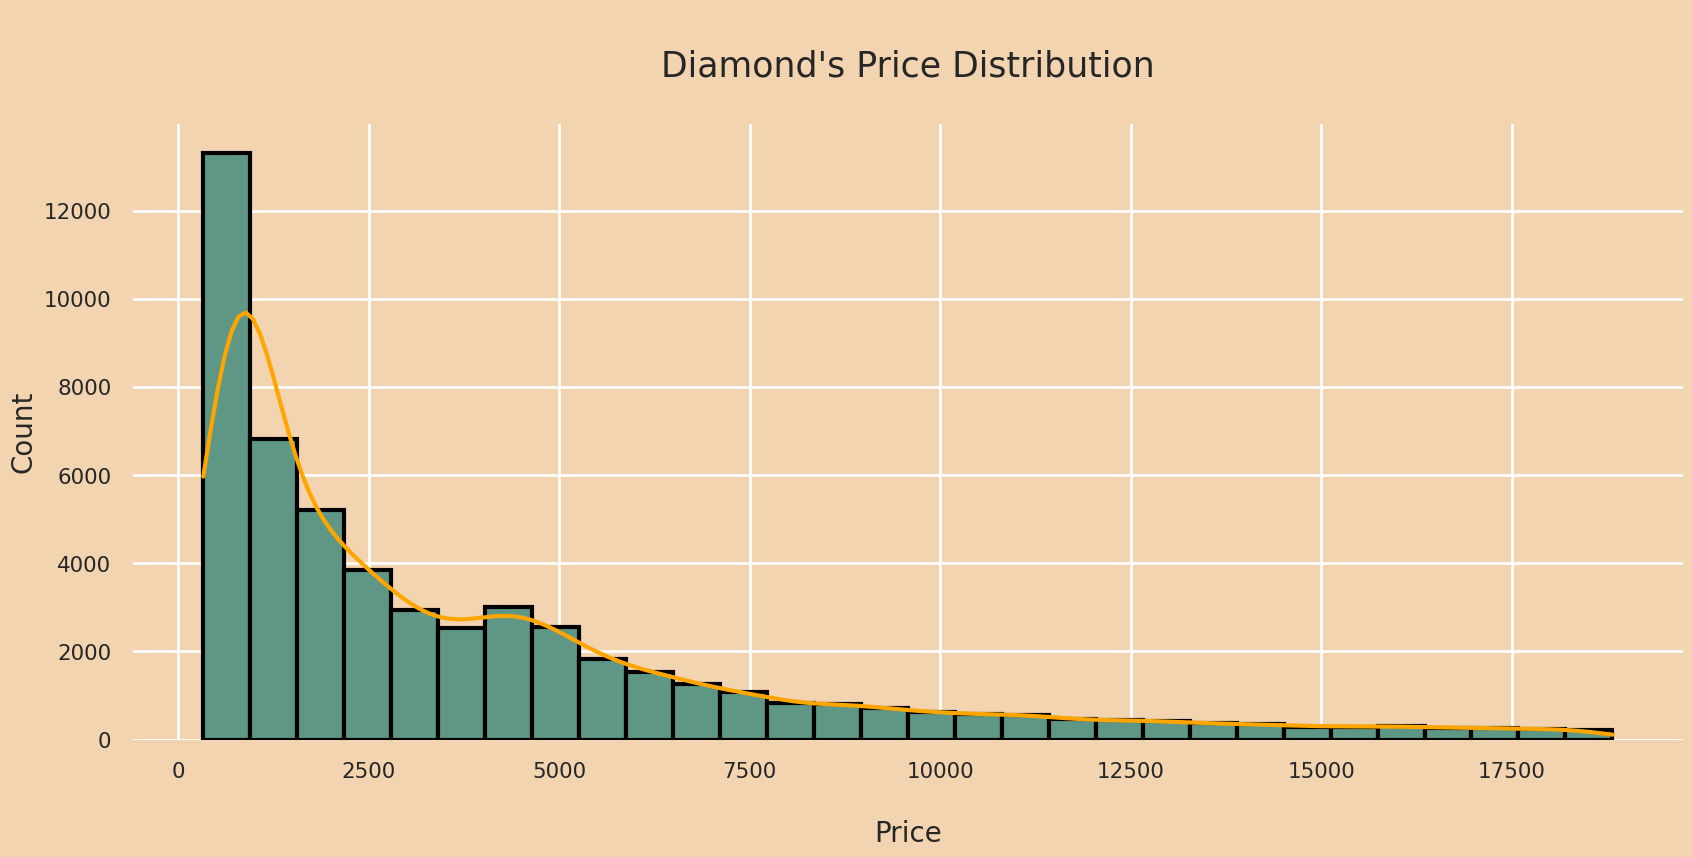

In [14]:
print(f"Let's have a look on the distribution of prices :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["price"],color=palette[6],kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Price Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nPrice",fontsize=20)
plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* We can see the price distribution is right skewed. Most of the prices fall in between **326** to **2000**.
* Also there is a lot of high and medium prices which belongs to the rearest and nearly rear diamonds.

<a id="7"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diamond's Cut</p>

Let's have a look on the ratio of diamond's cut :


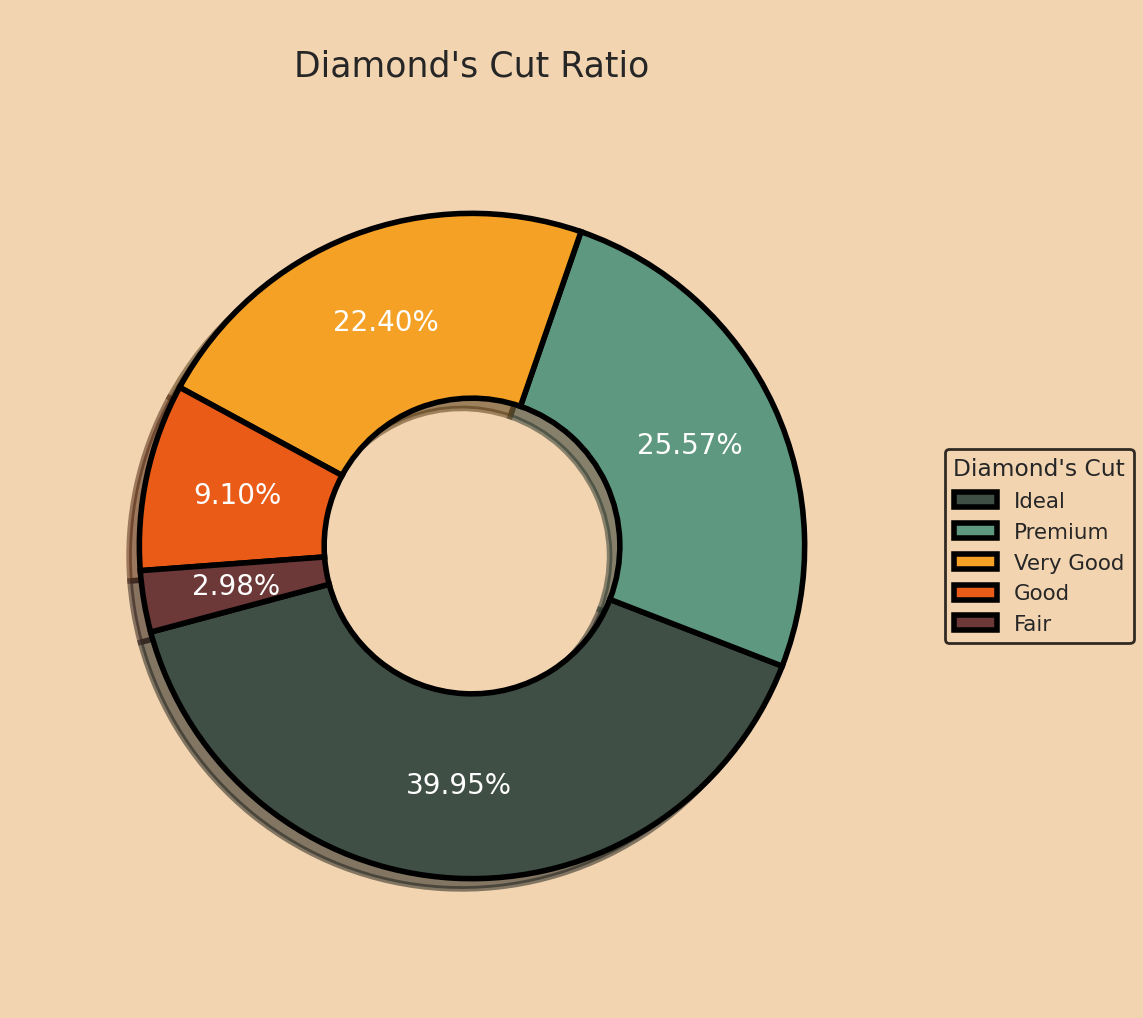

In [15]:
print(f"Let's have a look on the ratio of diamond's cut :")
plt.subplots(figsize=(12, 12))

labels = "Ideal","Premium","Very Good","Good","Fair"
size = 0.5

wedges, texts, autotexts = plt.pie([data["cut"].value_counts().values[0],
                                    data["cut"].value_counts().values[1],
                                    data["cut"].value_counts().values[2],
                                    data["cut"].value_counts().values[3],
                                    data["cut"].value_counts().values[4]],
                                    explode = (0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels, title="Diamond's Cut",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nDiamond's Cut Ratio",fontsize=25)
plt.show()

Let's have a look on the diamond's cut :


<ipython-input-16-83834dad87e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p=sns.countplot(y=data["cut"],order=data["cut"].value_counts().index,palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
<ipython-input-16-83834dad87e1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)


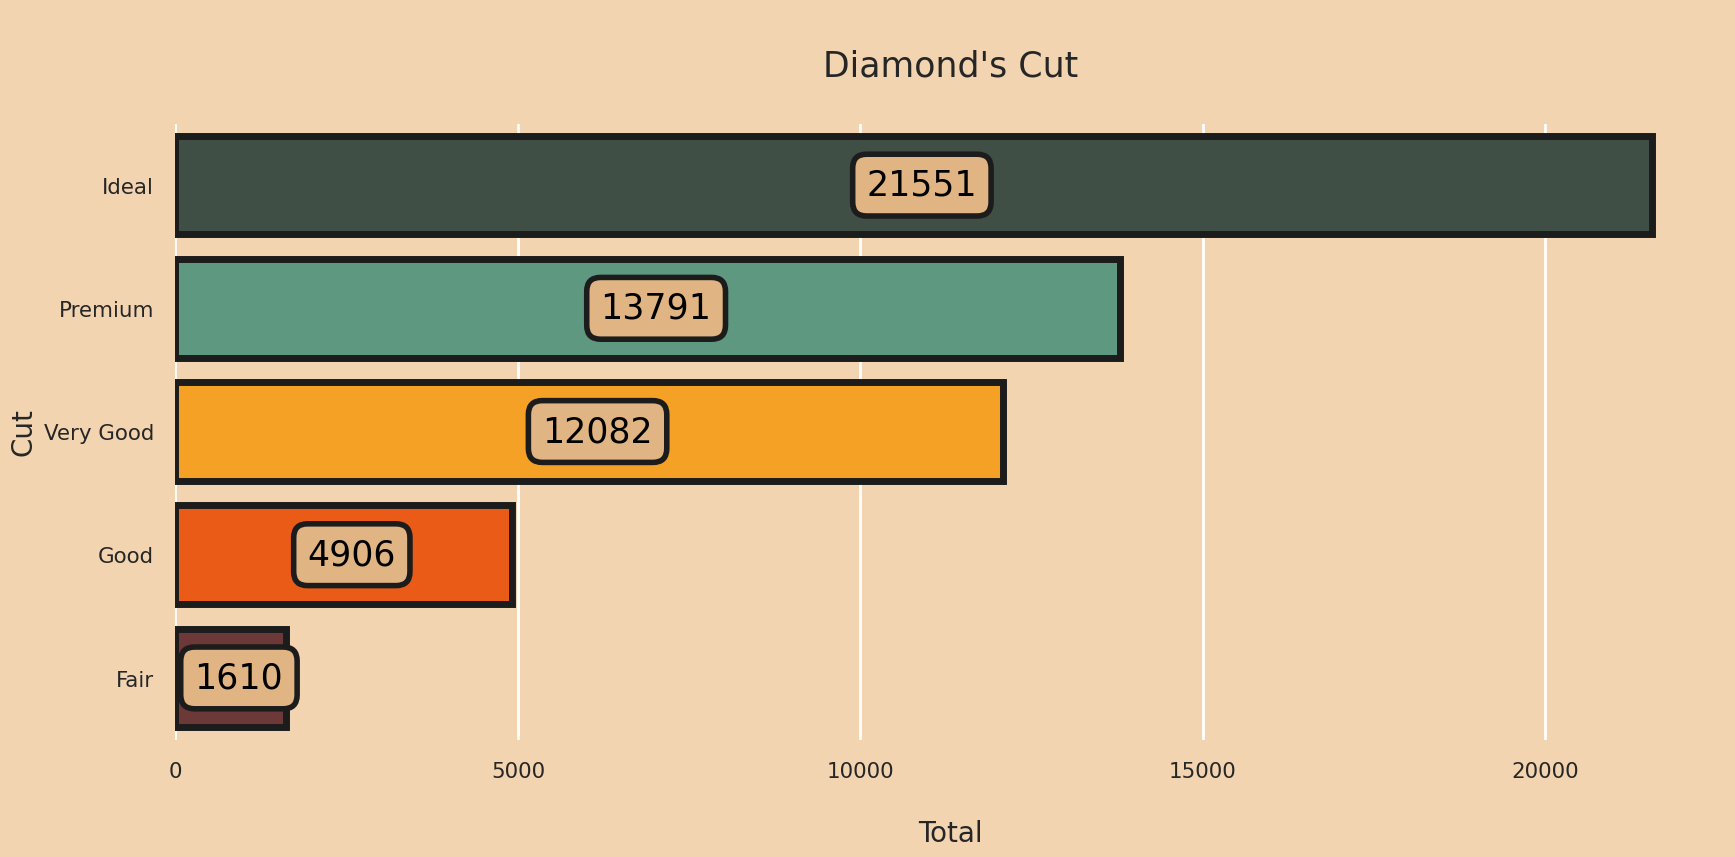

In [16]:
print("Let's have a look on the diamond's cut :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["cut"],order=data["cut"].value_counts().index,palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nDiamond's Cut\n",fontsize=25)
p.axes.set_ylabel("Cut",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the diamonds have **Ideal Cut** with a ratio of **39.95%** followed by **Premium Cut** and **Very Good Cut**
* Only few have **Fair Cut** with a ratio of **2.98%**.

Let's have a look on the price distribution of diamond's cut:


<ipython-input-18-8c4c673ed12d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.boxplot(x=data["cut"], y=data["price"], order=data["cut"].value_counts().index,


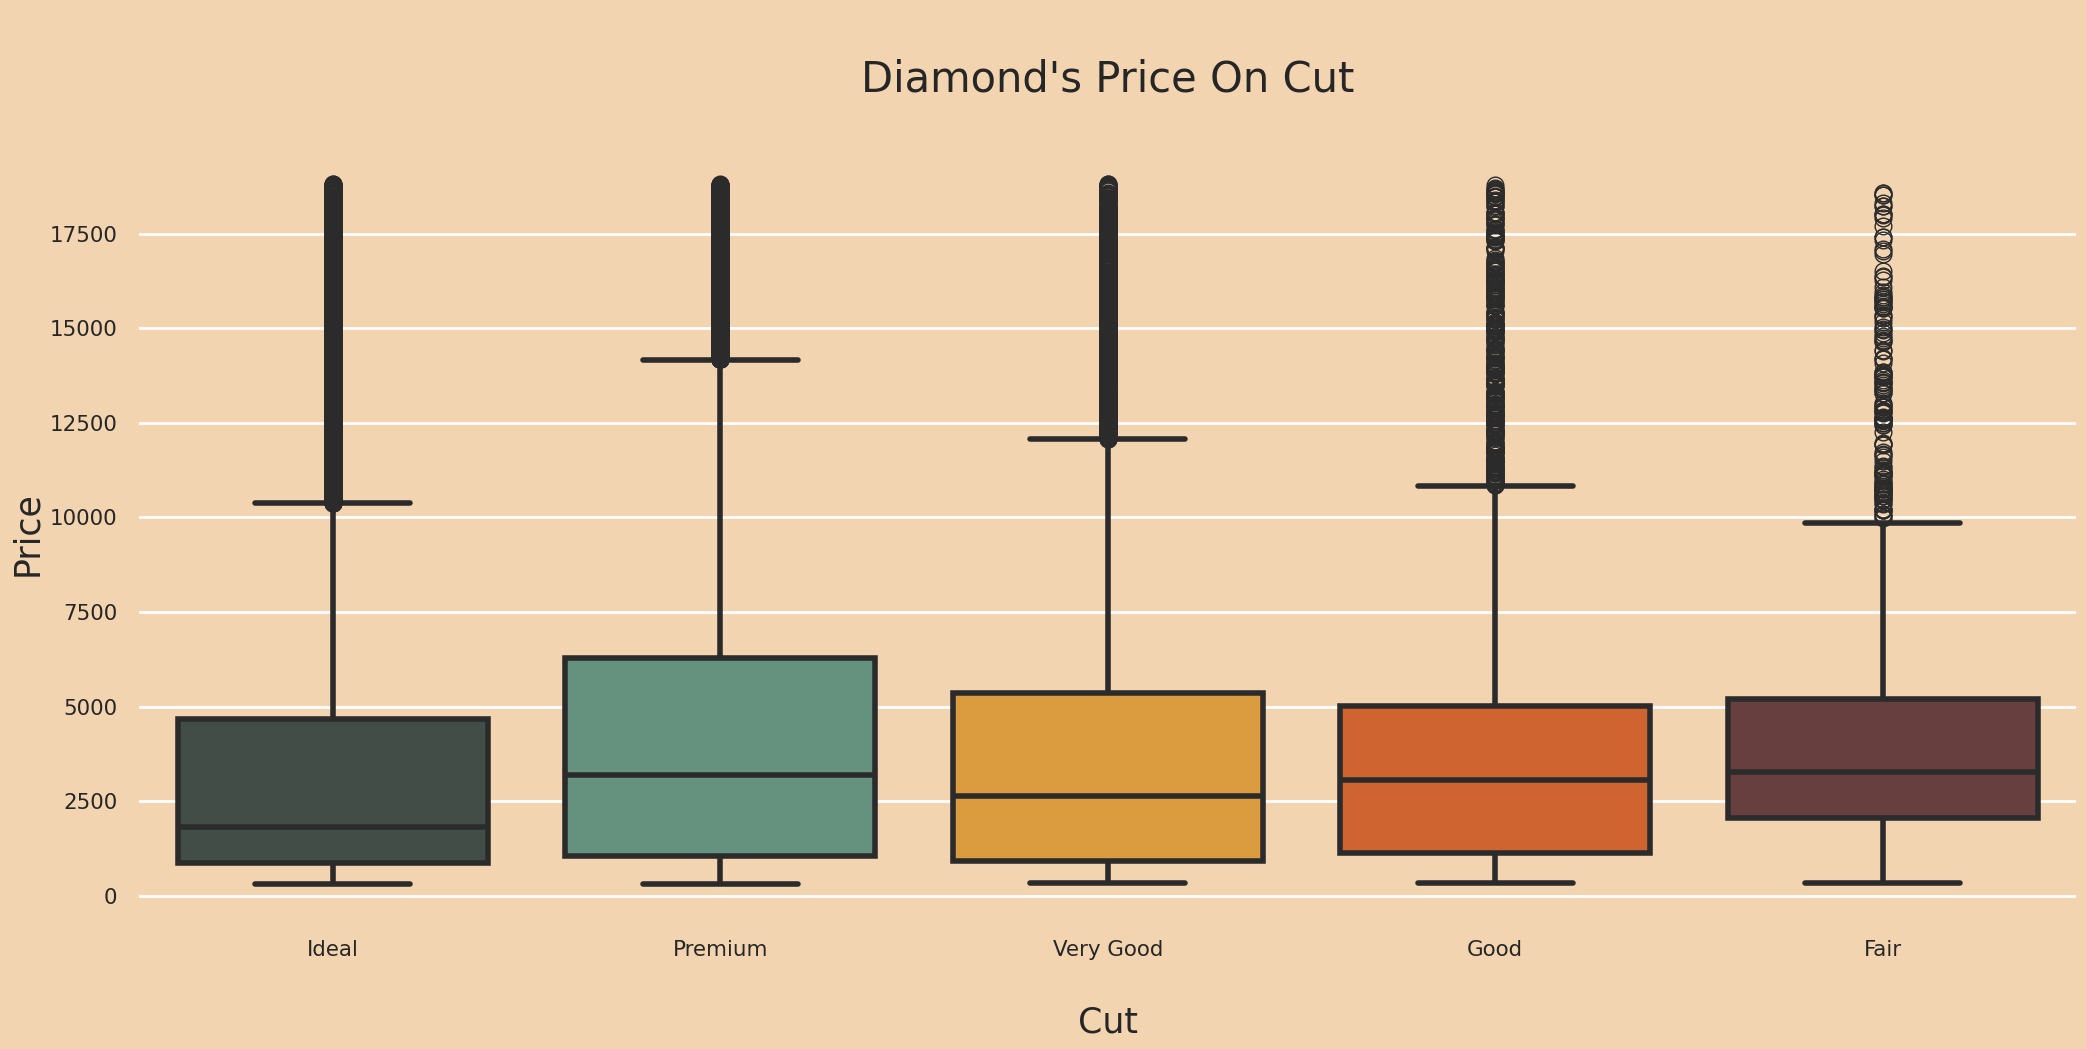

In [18]:
print("Let's have a look on the price distribution of diamond's cut:")

# Add your code to use a box plot, to provide a summary of the price distribution for each cut category, showing the median, quartiles, and potential outliers. use the Cut and the Price column



**Insights:**

* Most of the diamonds with **Ideal Cut** costs in between **326** to **2500**
* Most of the diamonds with **Premium Cut** costs in between **326** to **5000**
* Most of the diamonds with **Very Good Cut** costs in between **336** to **4800**
* Most of the diamonds with **Good Cut** costs in between **327** to **4700**
* Most of the diamonds with **Fair Cut** costs in between **337** to **5000**

<a id="8"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diamond's Color</p>

Let's have a look on the ratio of diamond's color :


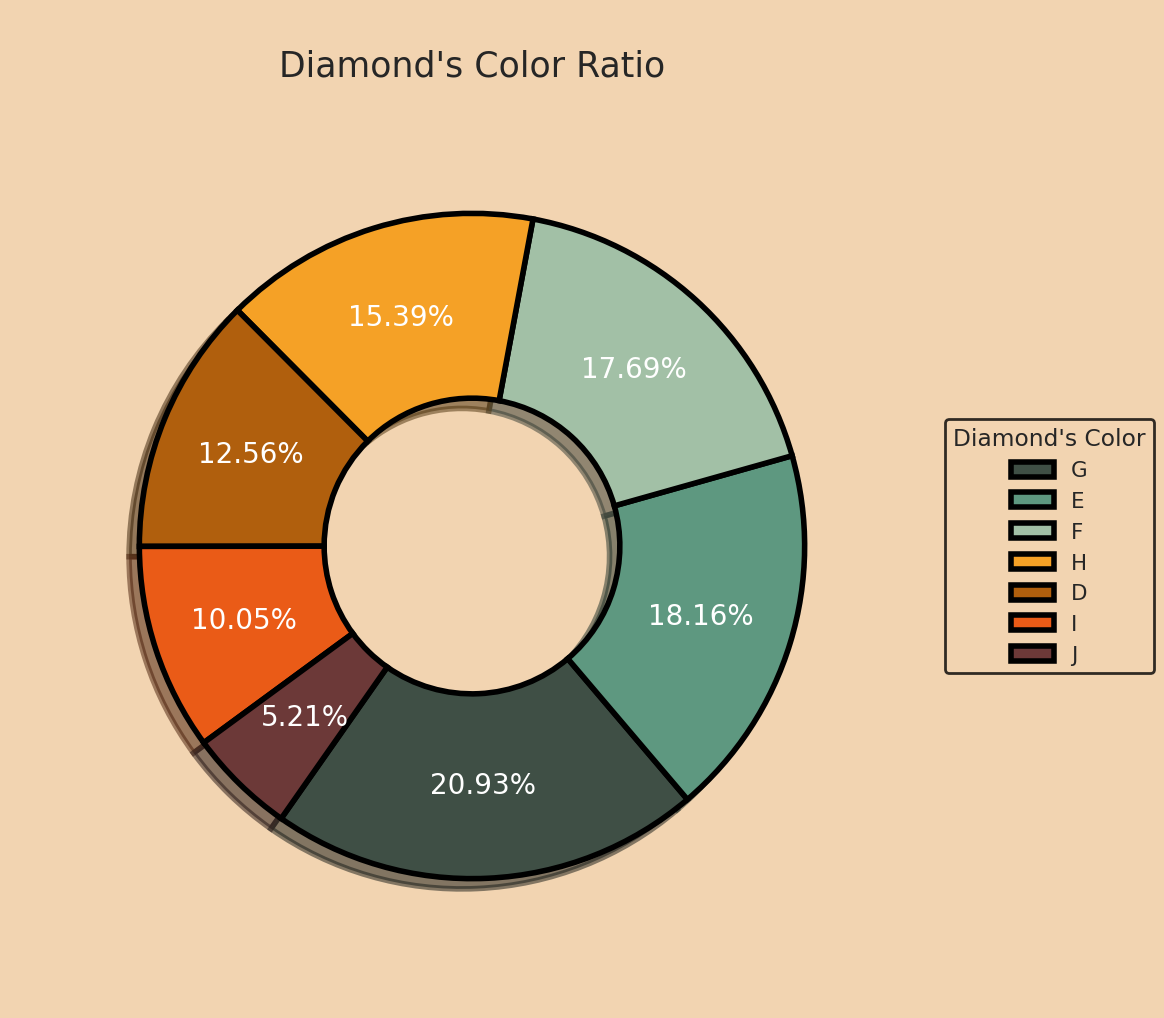

In [19]:
print(f"Let's have a look on the ratio of diamond's color :")
plt.subplots(figsize=(12, 12))

labels = "G","E","F","H","D","I","J"
size = 0.5

wedges, texts, autotexts = plt.pie([data["color"].value_counts().values[0],
                                    data["color"].value_counts().values[1],
                                    data["color"].value_counts().values[2],
                                    data["color"].value_counts().values[3],
                                    data["color"].value_counts().values[4],
                                    data["color"].value_counts().values[5],
                                    data["color"].value_counts().values[6]],
                                    explode = (0,0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#3f4f45","#5e9880","#a2c0a6","#f5a126","#b05f0d","#ea5b17","#6c3938"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = -125)

plt.legend(wedges, labels, title="Diamond's Color",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nDiamond's Color Ratio",fontsize=25)
plt.show()

Let's have a look on the diamond's color :


<ipython-input-20-f62251559b9f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p=sns.countplot(y=data["color"],order=data["color"].value_counts().index,palette=["#3f4f45","#5e9880","#a2c0a6","#f5a126","#b05f0d","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
<ipython-input-20-f62251559b9f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)


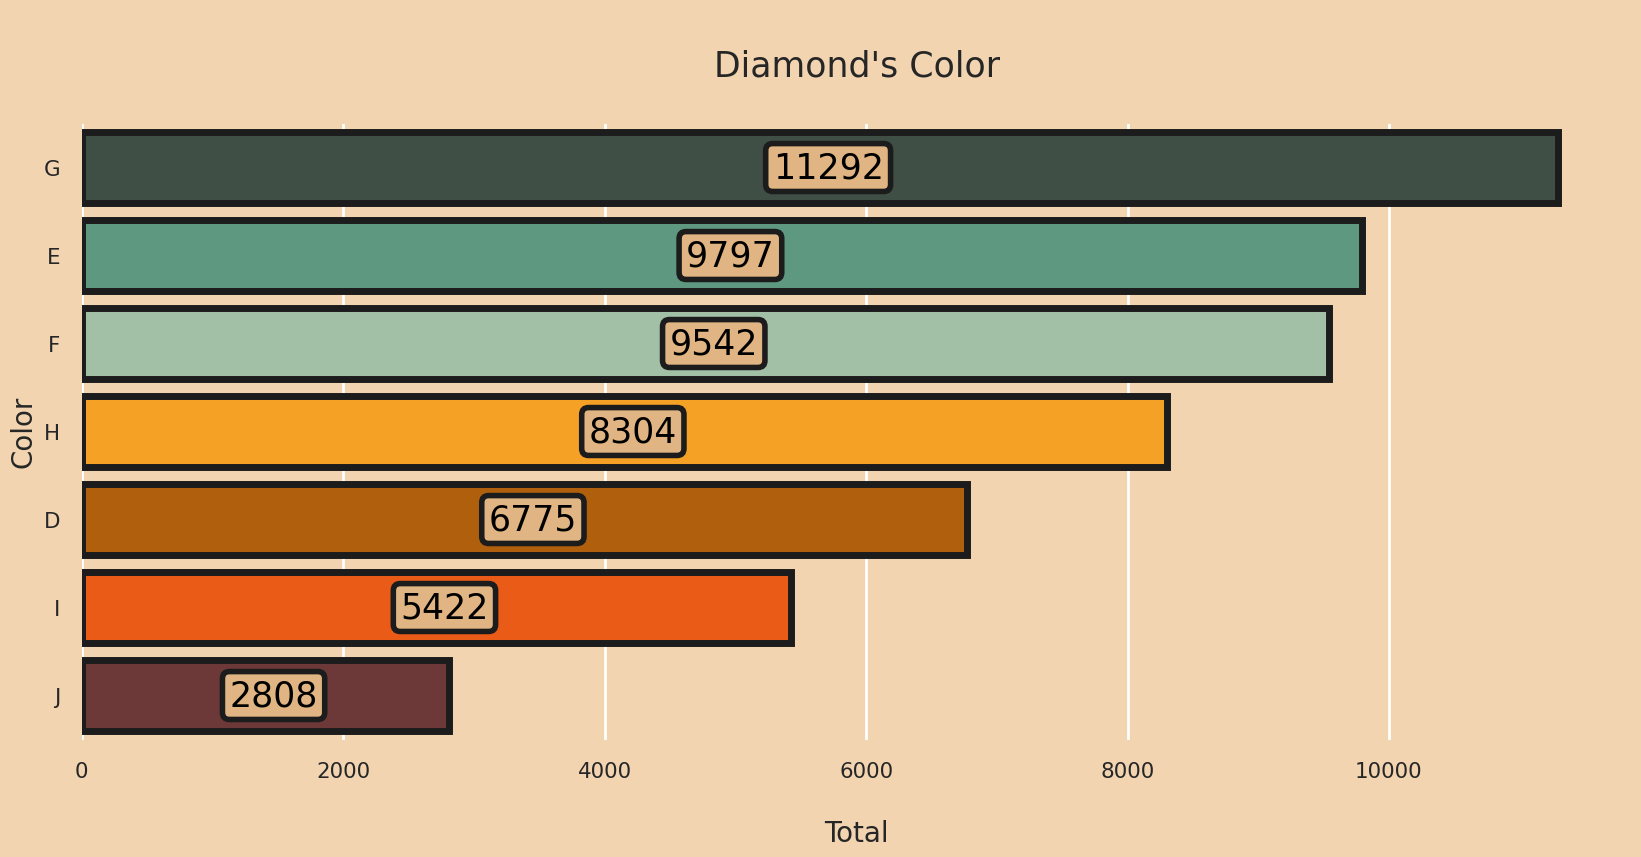

In [20]:
print("Let's have a look on the diamond's color :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["color"],order=data["color"].value_counts().index,palette=["#3f4f45","#5e9880","#a2c0a6","#f5a126","#b05f0d","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nDiamond's Color\n",fontsize=25)
p.axes.set_ylabel("Color",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=25,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the diamonds have **G** color with a ratio of **20.93%** followed by **E** and **F**
* Only few have **J** color with a ratio of **5.21%**.

In [ ]:
print("Let's have a look on the price distribution of diamond's color :")

# Add your code to use a box plot, to provide a summary of the price distribution for each diamond's color category, showing the median, quartiles, and potential outliers. use the diamond's color and the price column



**Insights:**

* Most of the diamonds with **G Color** costs in between **354** to **2500**
* Most of the diamonds with **E Color** costs in between **326** to **3700**
* Most of the diamonds with **F Color** costs in between **342** to **4500**
* Most of the diamonds with **H Color** costs in between **337** to **5200**
* Most of the diamonds with **D Color** costs in between **357** to **2500**
* Most of the diamonds with **I Color** costs in between **334** to **6200**
* Most of the diamonds with **J Color** costs in between **335** to **6400**

<a id="9"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diamond's Clarity</p>

Let's have a look on the ratio of diamond's clarity :


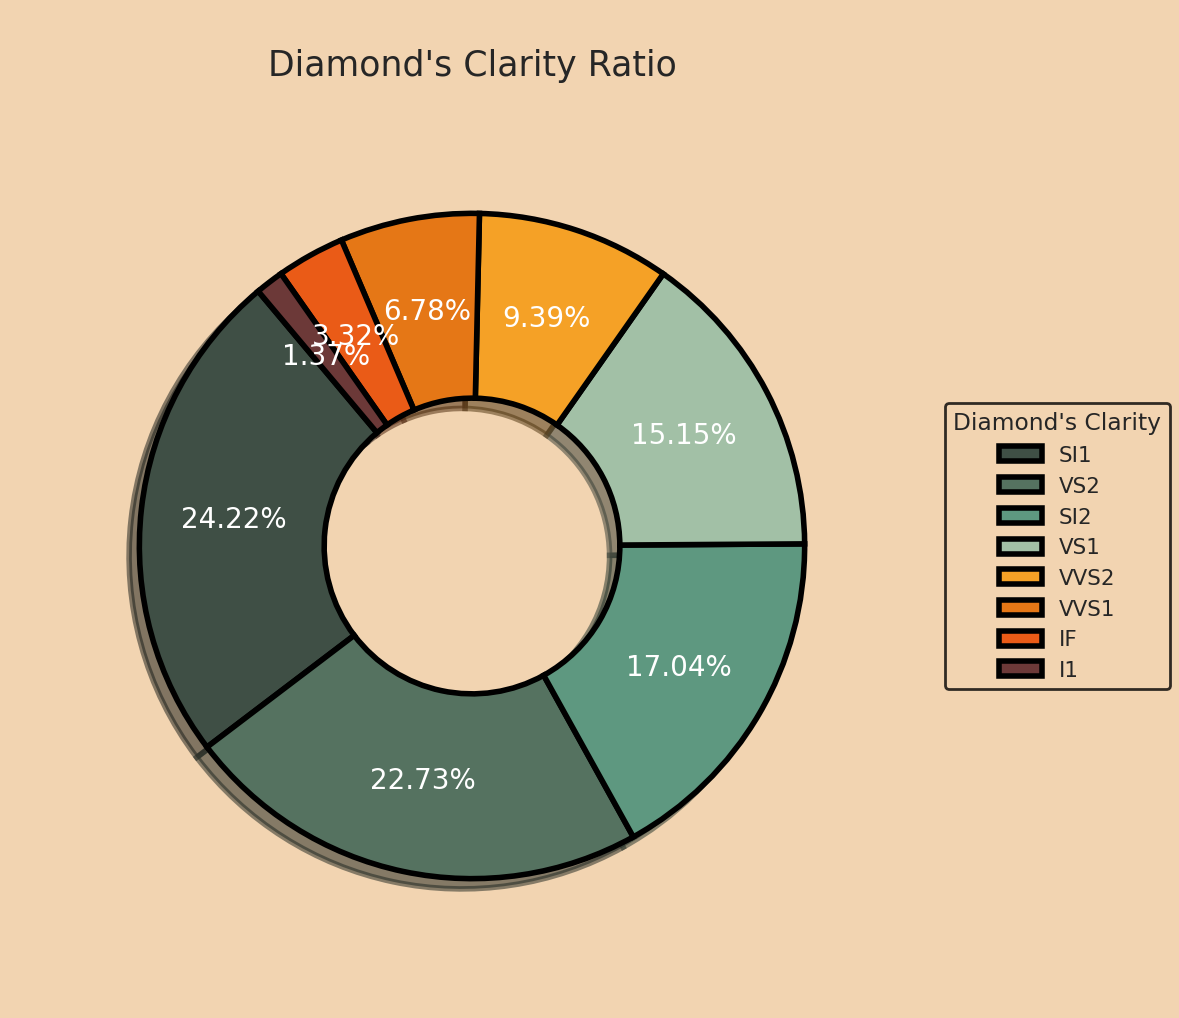

In [22]:
print(f"Let's have a look on the ratio of diamond's clarity :")
plt.subplots(figsize=(12, 12))

labels = "SI1","VS2","SI2","VS1","VVS2","VVS1","IF","I1"
size = 0.5

wedges, texts, autotexts = plt.pie([data["clarity"].value_counts().values[0],
                                    data["clarity"].value_counts().values[1],
                                    data["clarity"].value_counts().values[2],
                                    data["clarity"].value_counts().values[3],
                                    data["clarity"].value_counts().values[4],
                                    data["clarity"].value_counts().values[5],
                                    data["clarity"].value_counts().values[6],
                                    data["clarity"].value_counts().values[7]],
                                    explode = (0,0,0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#3f4f45","#557260","#5e9880","#a2c0a6","#f5a126","#e57716","#ea5b17","#6c3938"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = -230)

plt.legend(wedges, labels, title="Diamond's Clarity",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nDiamond's Clarity Ratio",fontsize=25)
plt.show()

Let's have a look on the diamond's clarity :


<ipython-input-23-8dbdc764881e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p=sns.countplot(y=data["clarity"],order=data["clarity"].value_counts().index,palette=["#3f4f45","#557260","#5e9880","#a2c0a6","#f5a126","#e57716","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
<ipython-input-23-8dbdc764881e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)


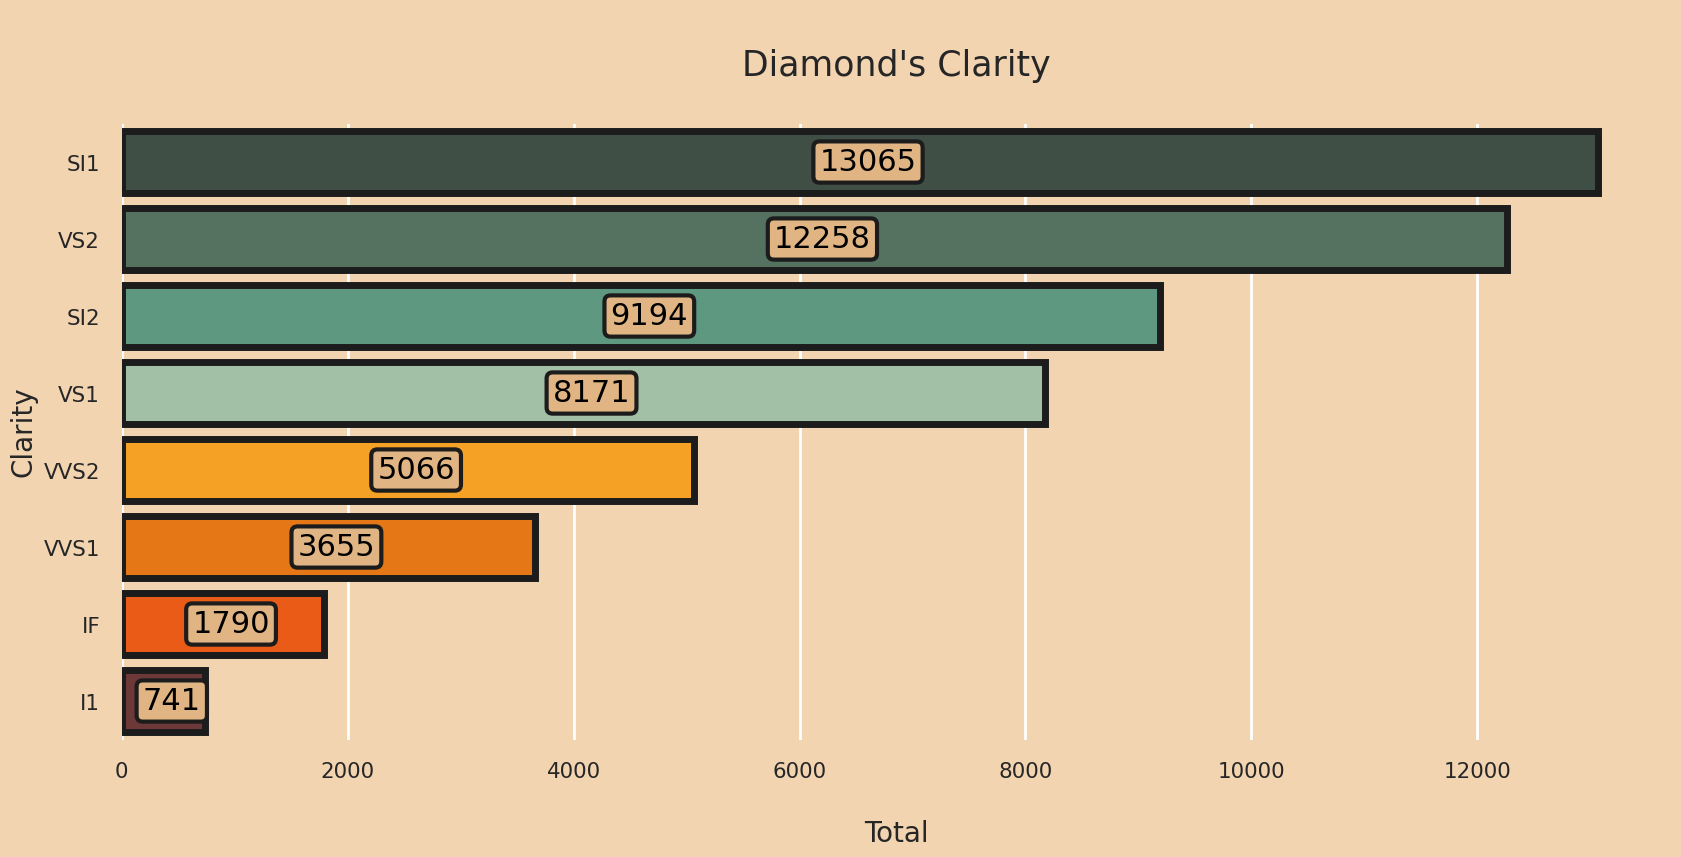

In [23]:
print("Let's have a look on the diamond's clarity :")
plt.subplots(figsize=(20, 8))
p=sns.countplot(y=data["clarity"],order=data["clarity"].value_counts().index,palette=["#3f4f45","#557260","#5e9880","#a2c0a6","#f5a126","#e57716","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
# p.axes.set_yscale("symlog")
p.axes.set_title("\nDiamond's Clarity\n",fontsize=25)
p.axes.set_ylabel("Clarity",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=22,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the diamonds have **SI1** clarity with a ratio of **24.22%** followed by **VS2** and **SI2**
* Only few have **I1** clarity with a ratio of **1.37%**.


In [ ]:
print("Let's have a look on the price distribution of diamond's clarity :")
# Add your code to use a box plot, to provide a summary of the price distribution for each diamond's clarity category, showing the median, quartiles, and potential outliers. use the diamond's clarity and the price column


**Insights:**

* Most of the diamonds with **SI1 Clarity** costs in between **326** to **5100**
* Most of the diamonds with **VS2 Clarity** costs in between **334** to **2600**
* Most of the diamonds with **SI2 Clarity** costs in between **326** to **5200**
* Most of the diamonds with **VS1 Clarity** costs in between **327** to **3600**
* Most of the diamonds with **VVS2 Clarity** costs in between **336** to **3500**
* Most of the diamonds with **VVS1 Clarity** costs in between **336** to **3000**
* Most of the diamonds with **IF Clarity** costs in between **369** to **2500**
* Most of the diamonds with **I1 Clarity** costs in between **345** to **7500**

<a id="10"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diamond's Weight In Carat</p>

Let's have a look on the distribution of weight in carat :


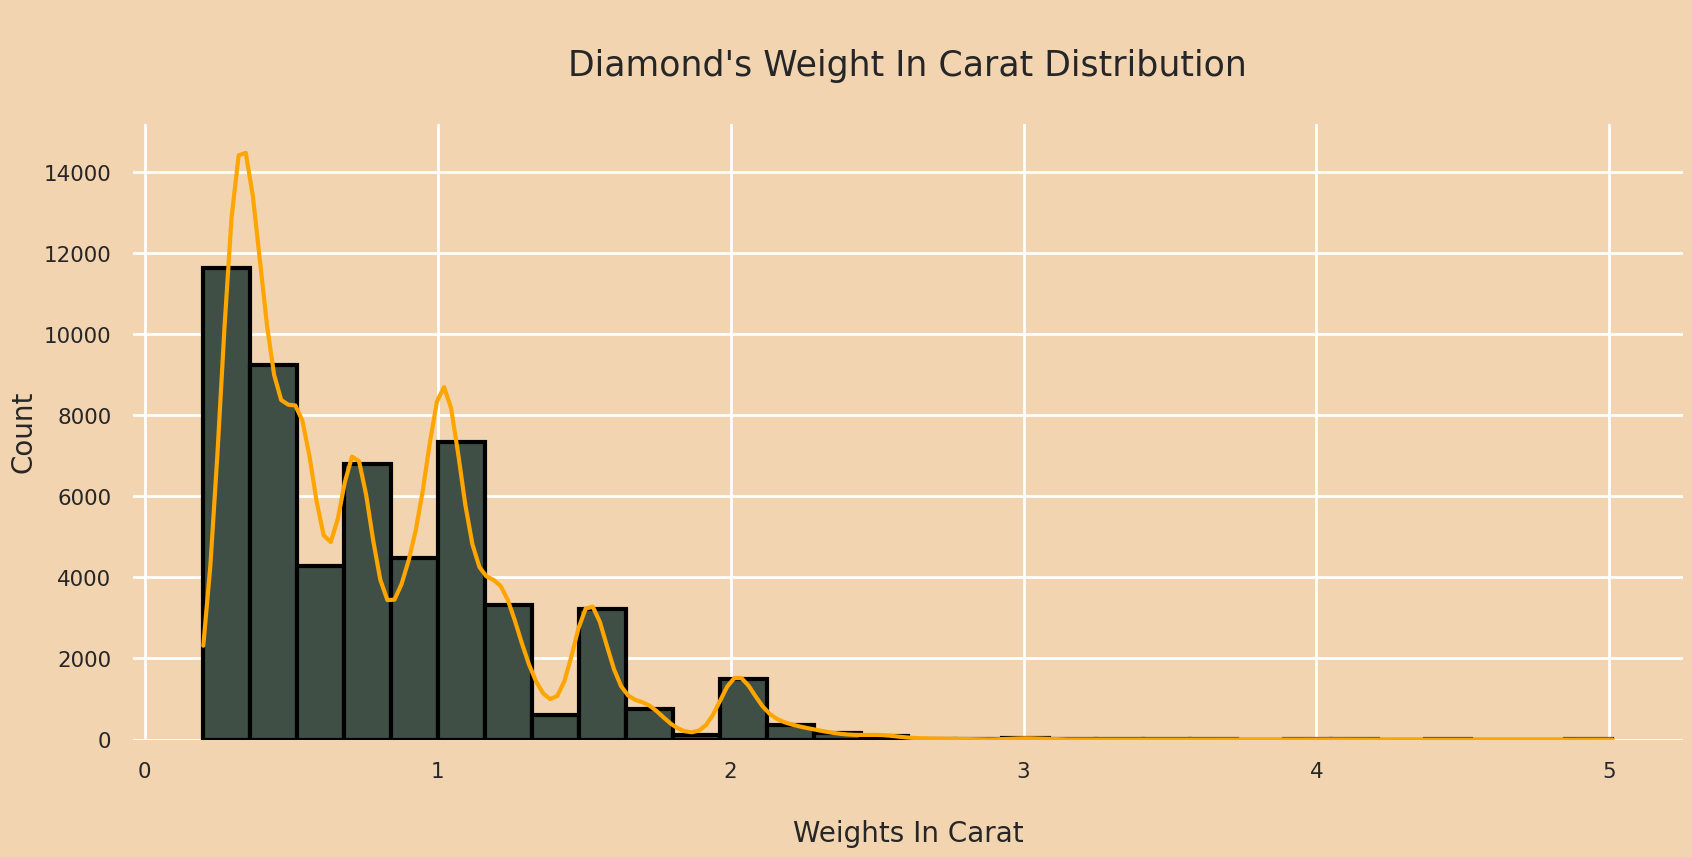

In [24]:
print(f"Let's have a look on the distribution of weight in carat :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["carat"],color="#3f4f45",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Weight In Carat Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nWeights In Carat",fontsize=20)
# plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

<a id="11"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diamond's Depth Percentage</p>

Let's have a look on the distribution of depth percentage :


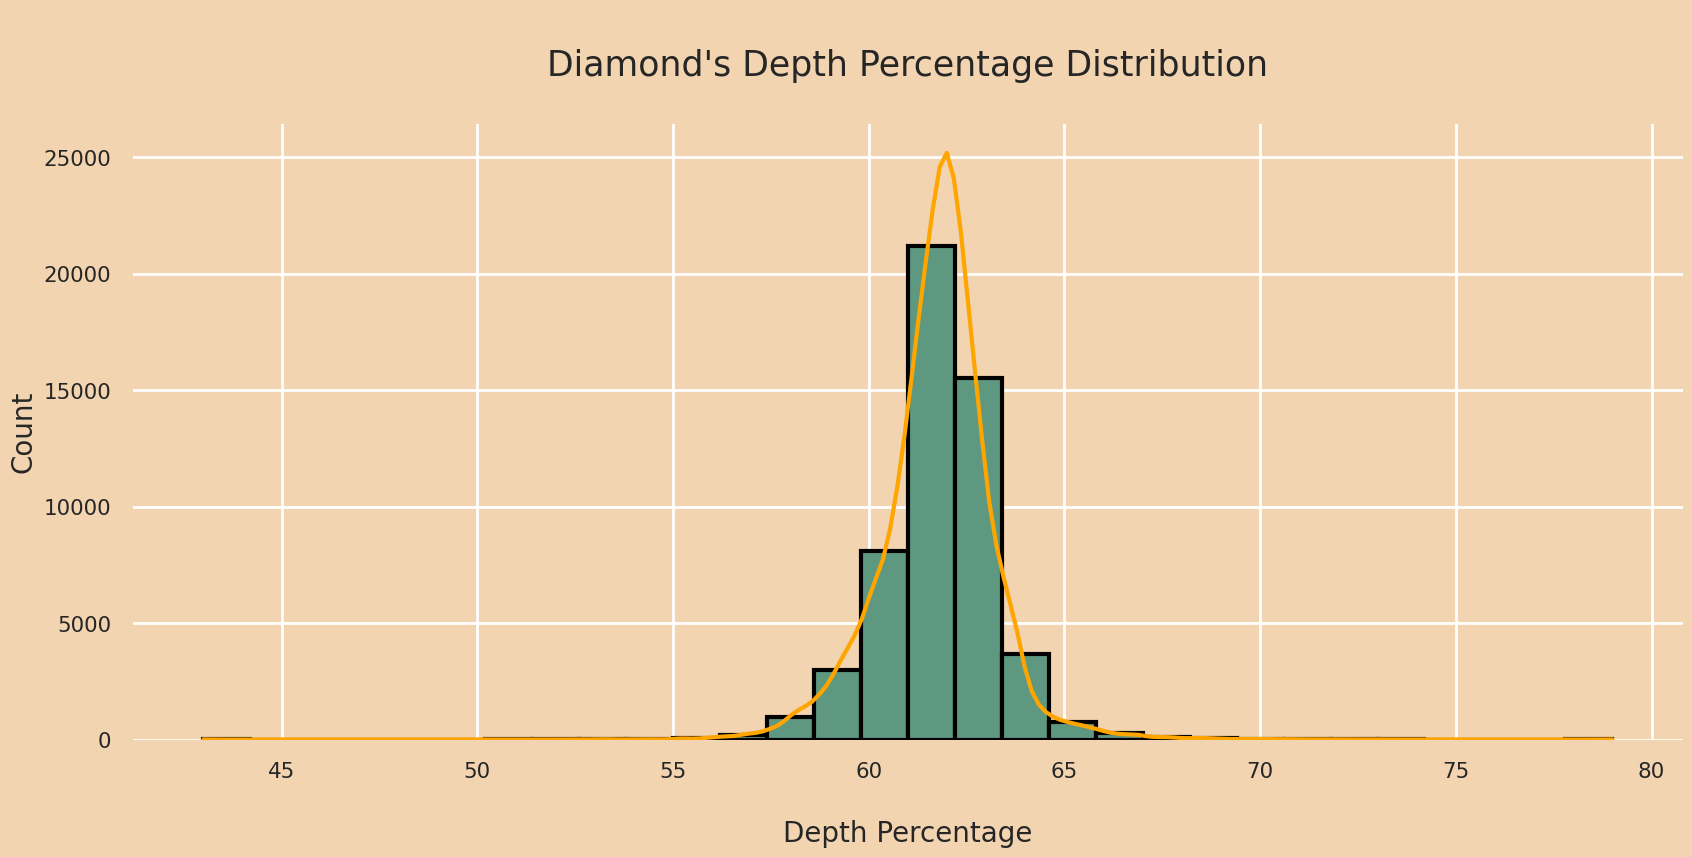

In [29]:
print(f"Let's have a look on the distribution of depth percentage :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["depth"],color="#5e9880",kde=True,bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Depth Percentage Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nDepth Percentage",fontsize=20)
# plt.yscale("linear")
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

**Add your insights to this box based on the graph**


<a id="12"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Diamond's Table</p>

Let's have a look on the distribution of diamond's table :


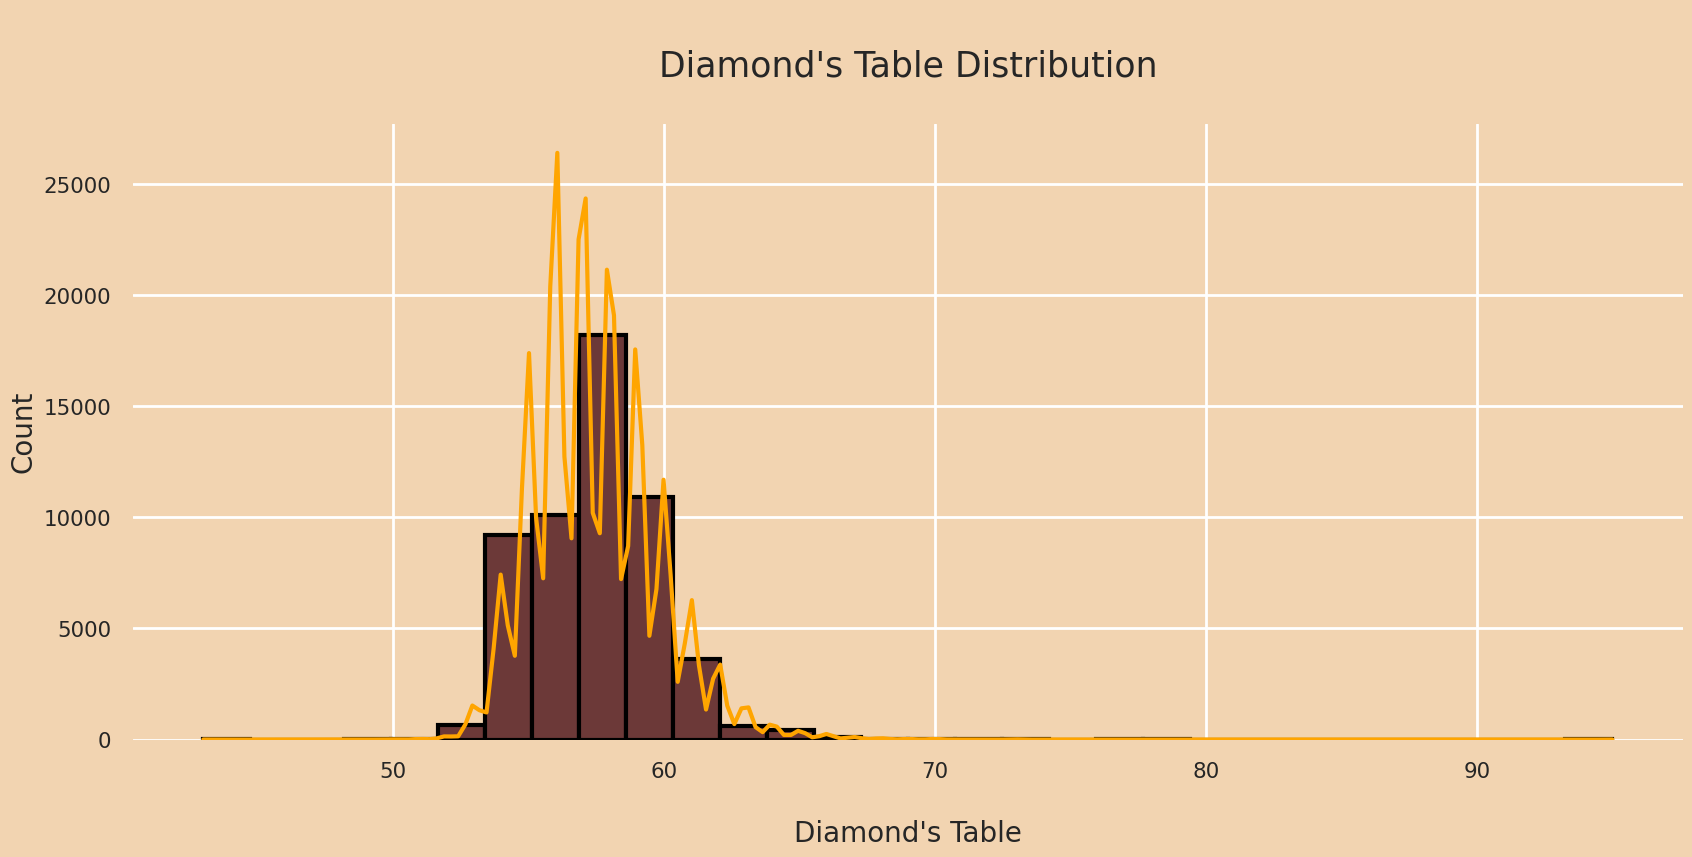

In [28]:
print(f"Let's have a look on the distribution of diamond's table :")

 #Add you code to plot the distribution of diamond's table

**Insights:**

**Add your insights here based on the figure above**.

<a id="13"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Outlier Detection</p>

Let's have a look on the pairwise relationships :


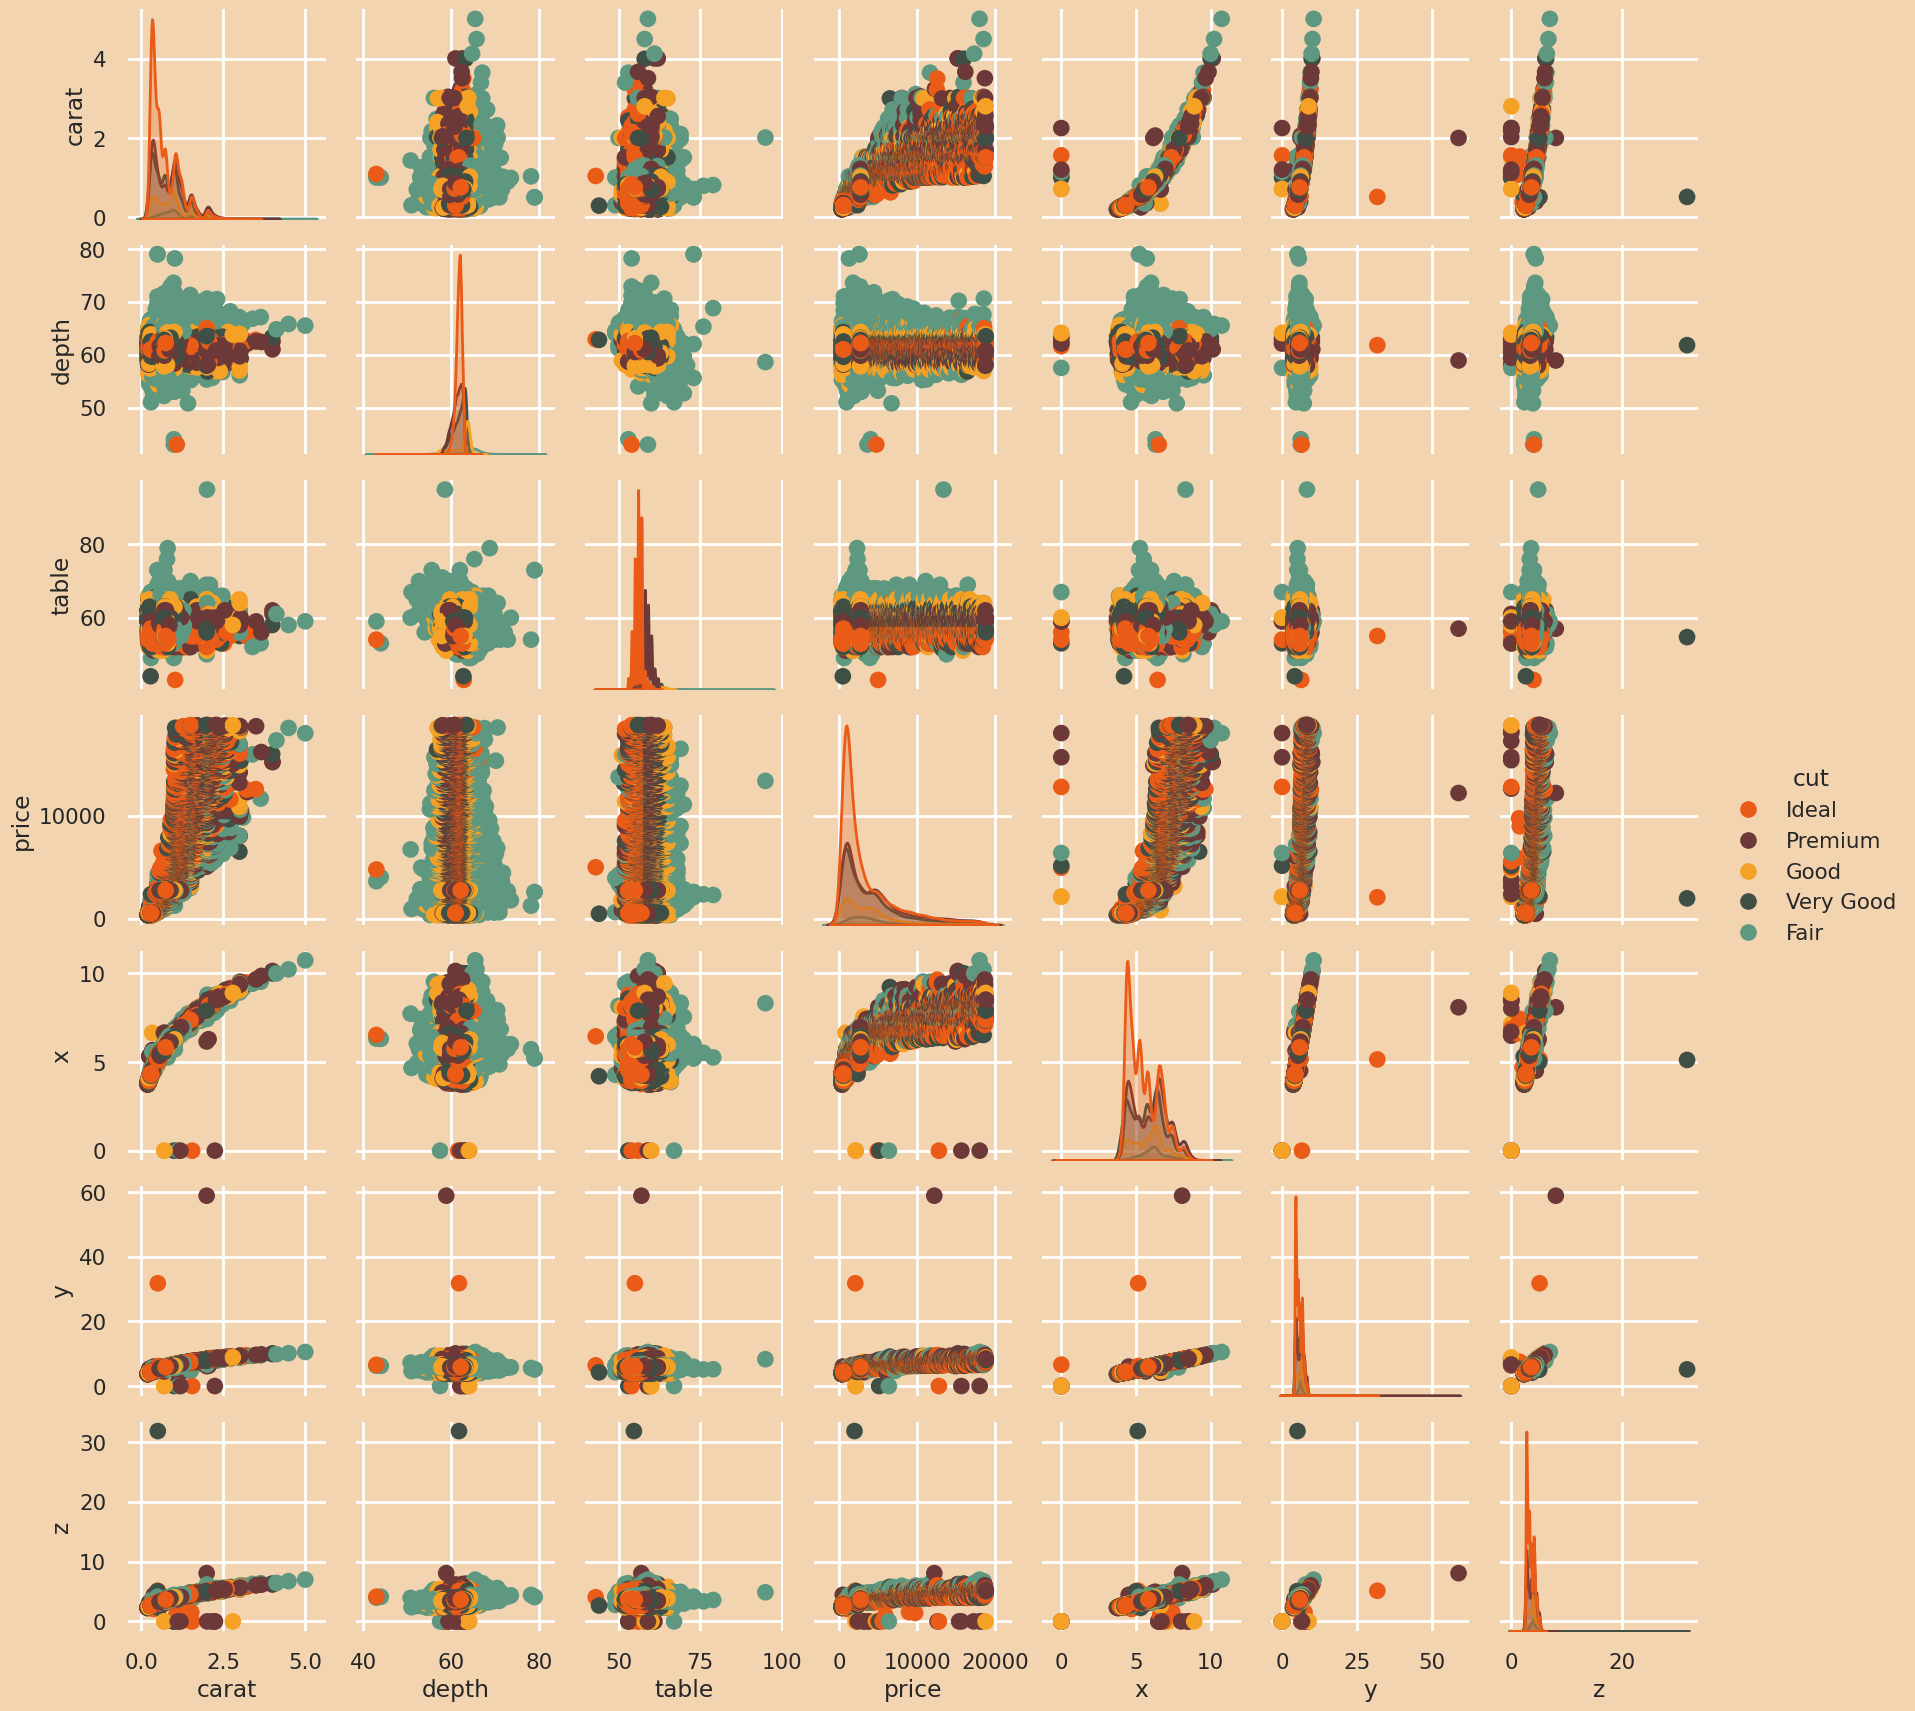

In [33]:
print(f"Let's have a look on the pairwise relationships :")

sns.pairplot(data=data,hue="cut",palette=["#ea5b17","#6c3938","#f5a126","#3f4f45","#5e9880"],plot_kws=dict(linewidth=0))
sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.
* **x**, **y** and **z** have some dimensional outlies in the dataset that needs to be eliminated.
* **depth**, **table** and **carat** should be capped before that we will examine the regression line for being sure.


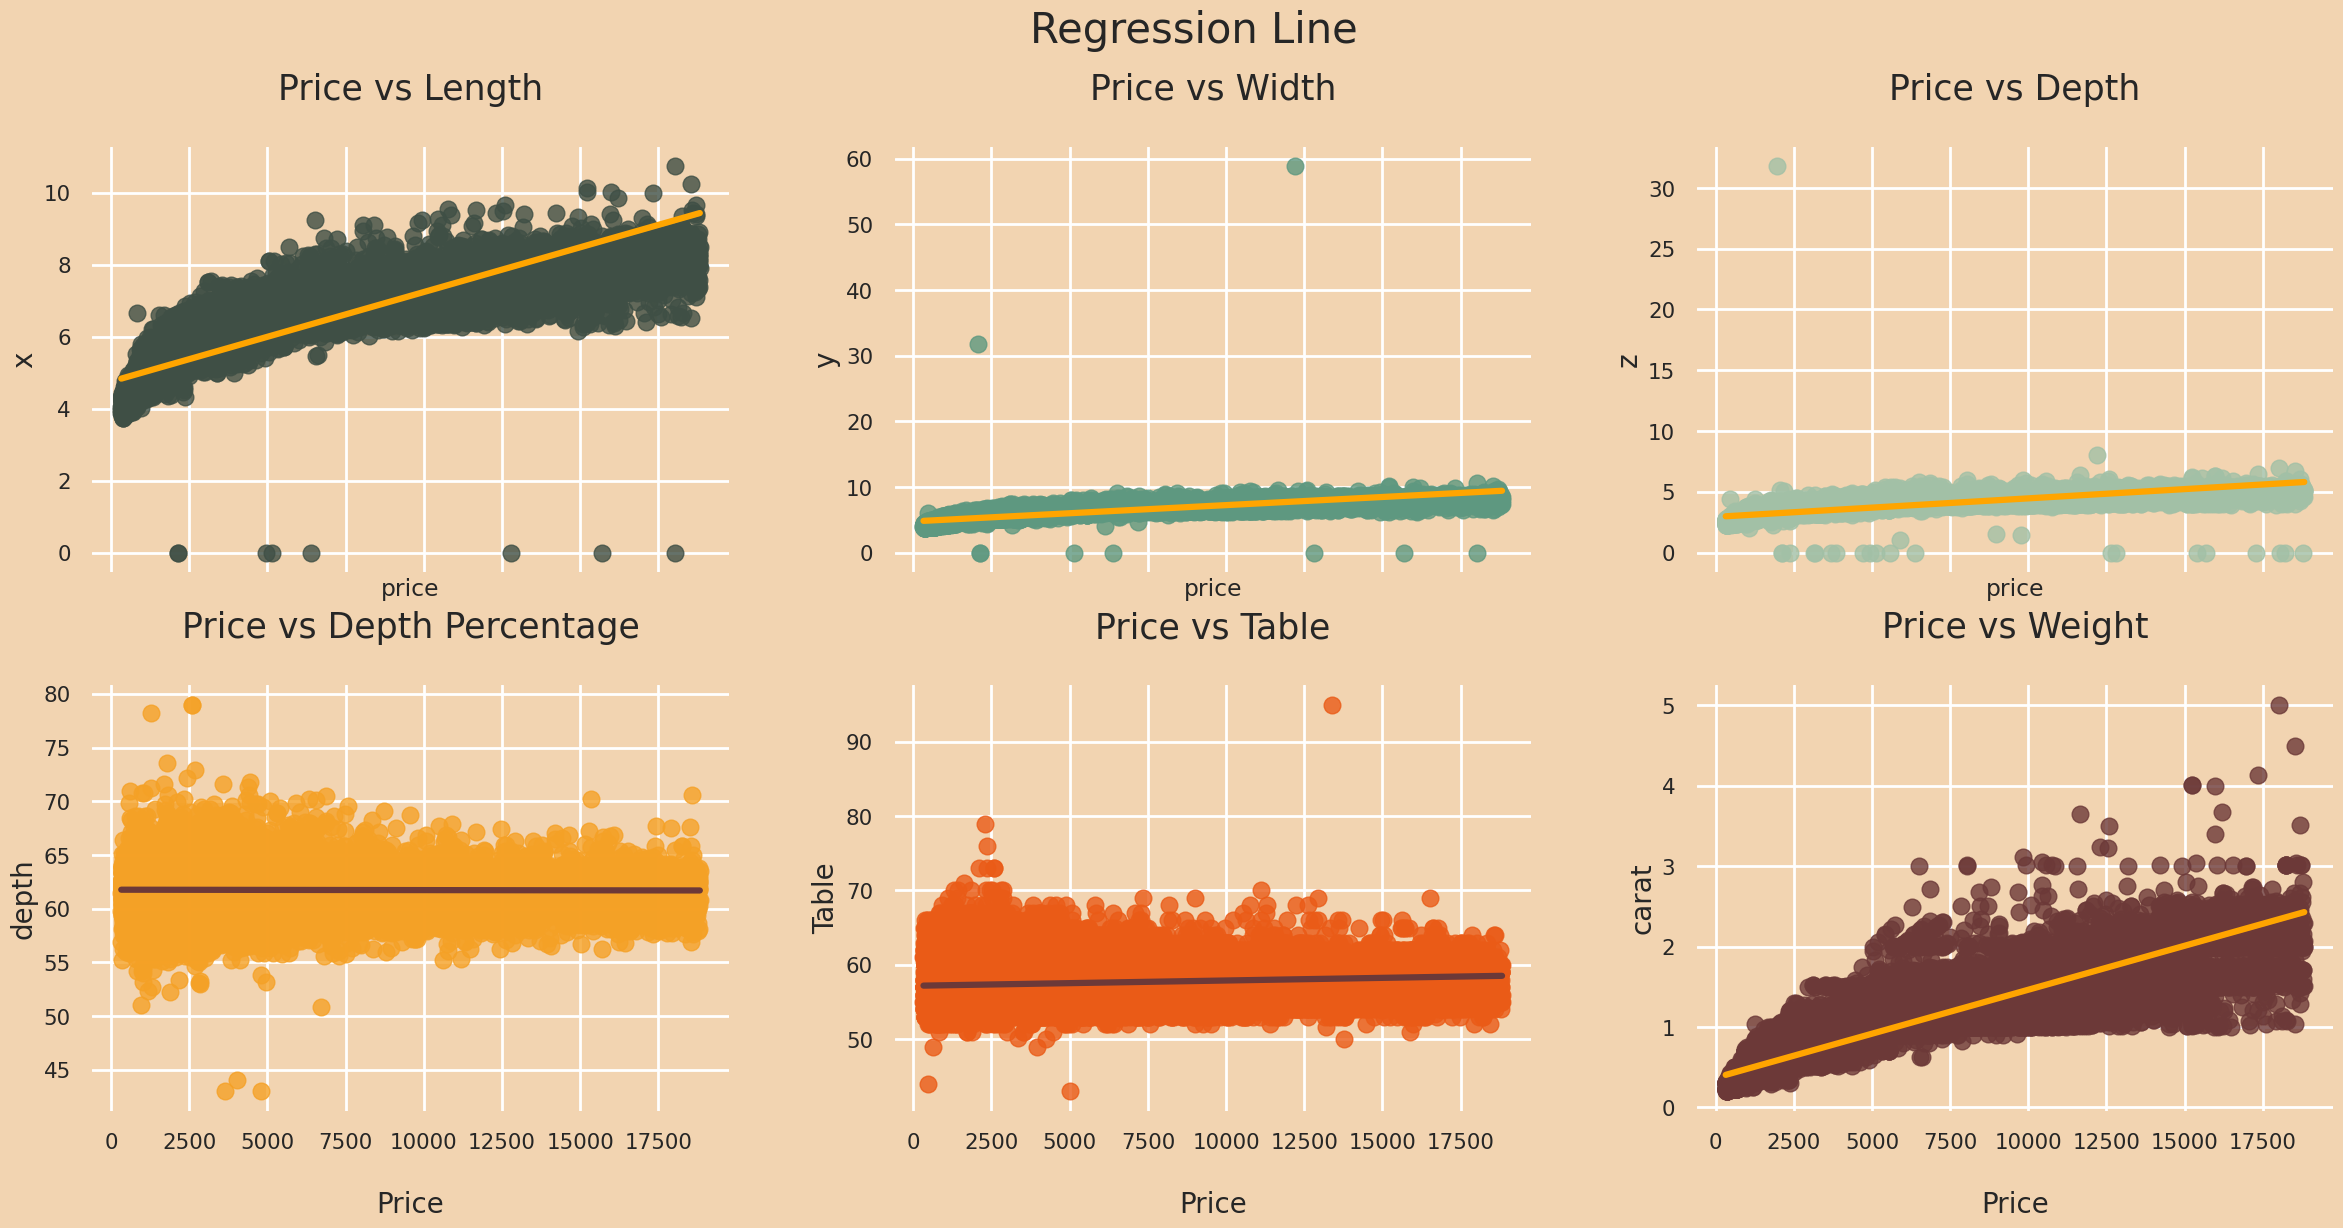

In [34]:
_, axs = plt.subplots(2,3,figsize=(25,12),sharex=True)
plt.tight_layout(pad=4.0)

sns.regplot(x="price", y="x", data=data, ax=axs[0,0], color="#3f4f45", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,0].set_title("Price vs Length\n",fontsize=25)
axs[0,0].set_ylabel("x",fontsize=20)

sns.regplot(x="price", y="y", data=data, ax=axs[0,1], color="#5e9880", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,1].set_title("Price vs Width\n",fontsize=25)
axs[0,1].set_ylabel("y",fontsize=20)

sns.regplot(x="price", y="z", data=data, ax=axs[0,2], color="#a2c0a6", fit_reg=True, line_kws=dict(color= "orange"))
axs[0,2].set_title("Price vs Depth\n",fontsize=25)
axs[0,2].set_ylabel("z",fontsize=20)

sns.regplot(x="price", y="depth", data=data, ax=axs[1,0], color="#f5a126", fit_reg=True, line_kws=dict(color= "#6c3938"))
axs[1,0].set_title("Price vs Depth Percentage\n",fontsize=25)
axs[1,0].set_xlabel("\nPrice",fontsize=20)
axs[1,0].set_ylabel("depth",fontsize=20)

sns.regplot(x="price", y="table", data=data, ax=axs[1,1], color="#ea5b17", fit_reg=True, line_kws=dict(color= "#6c3938"))
axs[1,1].set_title("Price vs Table\n",fontsize=25)
axs[1,1].set_xlabel("\nPrice",fontsize=20)
axs[1,1].set_ylabel("Table",fontsize=20)

sns.regplot(x="price", y="carat", data=data, ax=axs[1,2], color="#6c3938", fit_reg=True, line_kws=dict(color= "orange"))
axs[1,2].set_title("Price vs Weight\n",fontsize=25)
axs[1,2].set_xlabel("\nPrice",fontsize=20)
axs[1,2].set_ylabel("carat",fontsize=20)

plt.suptitle("Regression Line",fontsize=30, y=1.03)
sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* We can clearly spot the outliers in these attributes. We will remove these outliers.

In [ ]:
# Add your code here to remove the outliers

print(f"After dropping outliers, let's have a look on the pairwise relationships :")

sns.pairplot(data=data,hue="cut",palette=["#ea5b17","#6c3938","#f5a126","#3f4f45","#5e9880"],plot_kws=dict(linewidth=0))
sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* We have dropped the outliers.
* This is now a much cleaner dataset.

<a id="14"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Map</p>

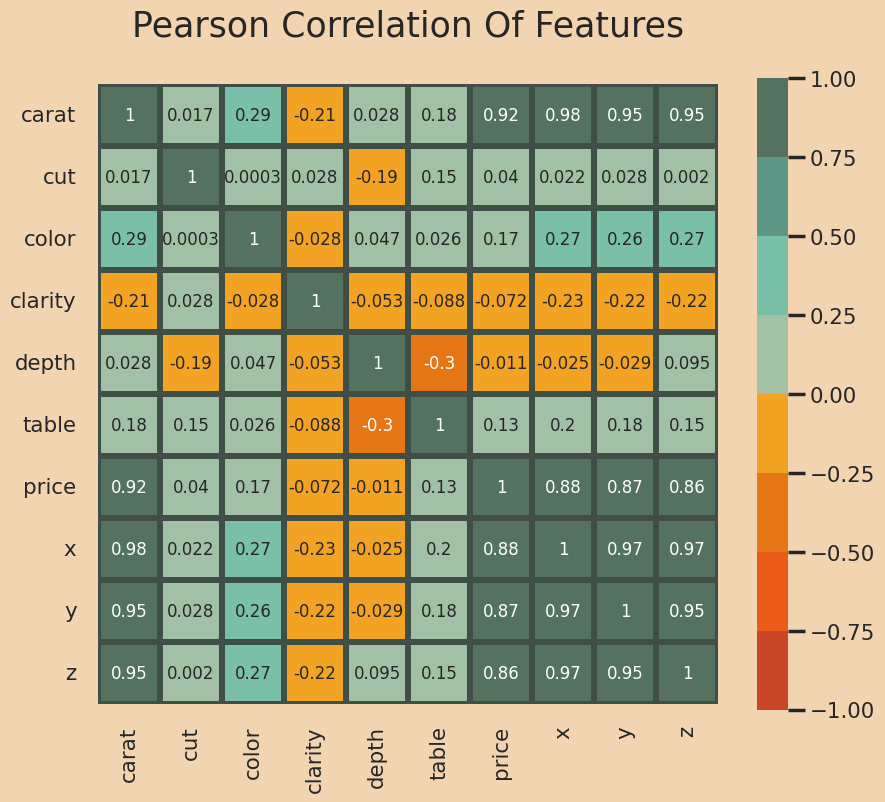

In [35]:
catcol = ["color","clarity","cut"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(10, 10))

sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#3f4f45',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Insights:**

* High correlation between price and carat. Also high correlation between price and length(x), price and width(y), price and depth(z).
* High correlation between carat and length(x), carat and width(y), carat and depth(z).
* length(x) is fully correlated with width(y). Length(x) is almost fully correlated with depth(z) as like width(y) and depth(z).

<a id="15"></a>
# <p style="padding:10px;background-color:#0fa79f;margin:0;color:#111423;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Creation & Performance Evaluation</p>

In [36]:
# dont change- run as is
x= data.drop(["price"],axis =1)
y= data["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  #we have splitted the dataset with a ratio of 0.2 that means 80% data for training and 20% data for validation process.


In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print("After Performing Linear Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,y_pred)}")
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred,squared = False)}")

After Performing Linear Regression,

R Squared Value: 0.8851397433679632
Adjusted R Squared Value: 0.8850438311106159
Mean Absolute Error: 858.7084697710086
Mean Squared Error: 1825912.9915253473
Root Mean Squared Error: 1351.263479683125


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;color:white;display:fill;border-radius:20px 50px;background-color:#FDD667;font-size:200%;font-weight: 500;color:#111423;overflow:hidden;">ㅤDecision Tree Regressionㅤ</span>

In [38]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print("After Performing Decision Tree Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,y_pred)}")
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred,squared = False)}")

After Performing Decision Tree Regression,

R Squared Value: 0.9670901606464635
Adjusted R Squared Value: 0.9670626798008352
Mean Absolute Error: 354.5042639970337
Mean Squared Error: 523161.84019280685
Root Mean Squared Error: 723.2992742930182


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;color:white;display:fill;border-radius:20px 50px;background-color:#FDD667;font-size:200%;font-weight: 500;color:#111423;overflow:hidden;">ㅤRandom Forest Regressionㅤ</span>

In [40]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print("After Performing Random Forest Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,y_pred)}")
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred,squared = False)}")

After Performing Random Forest Regression,

R Squared Value: 0.9814765251359139
Adjusted R Squared Value: 0.9814610573985065
Mean Absolute Error: 268.23485708584195
Mean Squared Error: 294464.3725712732
Root Mean Squared Error: 542.6457155191342


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;color:white;display:fill;border-radius:20px 50px;background-color:#FDD667;font-size:200%;font-weight: 500;color:#111423;overflow:hidden;">ㅤK-Neighbors Regressionㅤ</span>

In [ ]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)

print("After Performing K-Neighbors Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,y_pred)}")
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred,squared = False)}")

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;color:white;display:fill;border-radius:20px 50px;background-color:#FDD667;font-size:200%;font-weight: 500;color:#111423;overflow:hidden;">ㅤXGBoost Regressionㅤ</span>

In [ ]:
xr = XGBRegressor()
xr.fit(x_train,y_train)
y_pred = xr.predict(x_test)

print("After Performing XGBoost Regression,\n")
print(f"R Squared Value: {metrics.r2_score(y_test,y_pred)}")
print(f"Adjusted R Squared Value: {1-(1-metrics.r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred,squared = False)}")

# Exercise 1: Discretization using Equal Width and Equal Frequency Binning
**Objective**: Apply discretization techniques to the "carat" feature.

1. Use equal-width binning to divide the "carat" feature into 4 bins.

2. Use equal-frequency binning to divide the "carat" feature into 4 equal-frequency bins.

3. Plot the binned data to compare the distributions from both techniques.

4. Discuss the differences in bin sizes and how they affect the representation of the data.

**Expected Output**:

1. Histograms showing both discretized datasets.
2. Explanation of when to use equal-width vs equal-frequency binning.

In [ ]:
# add your code here

# Exercise 2: K-Means Clustering on Diamond Characteristic

**Objective**: Group diamonds based on their characteristics using K-Means Clustering.

1. Use K-Means clustering to classify diamonds based on "carat," "depth," and "table."
2. Set the number of clusters to 3 and 5.
3. Visualize the clusters using scatter plots, coloring points by their cluster assignments.
4. Interpret the results and describe how well the clusters differentiate between diamonds of varying qualities.
5. Use the binned the feature variables to predict the price using a Decision Tree model.

**Expected Output:**

1. Scatter plots showing the clustering results.
2. Discussion on the characteristics of the different clusters.
2. Comparison of how clustring affects prediction accuracy.

In [ ]:
# add your code here

# Exercise 3: Equal Frequency Binning for Cut Quality Prediction
**Objective**: Use equal-frequency binning to categorize diamonds based on their cut.

1. Create equal-frequency bins for the "cut" variable.
2. Use the binned "cut" variable to predict the price using a Decision Tree model.
3. Compare the results of using the original and binned "cut" variable in terms of predictive performance.

**Expected Output:**

1. Performance metrics for both models.
2. Comparison of how binning affects prediction accuracy.